In [1]:
import pandas as pd
import numpy as np
import string
import os
import glob

In [2]:
folder_path = 'Dataset/Task2/train/neg/'
file_list = glob.glob(folder_path + "/*.txt")
train_neg = pd.DataFrame(pd.read_table(file_list[0], header=None))

print(len(file_list))
for i in range(1,len(file_list)):
    data = pd.read_table(file_list[i], header=None)
    df = pd.DataFrame(data)
    train_neg = pd.concat([train_neg, df], axis = 0)

train_neg.head()

12500


,0,1,2,3,4,5,6,7
0,Story of a man who has unnatural feelings for ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Airport '77 starts as a brand new luxury 747 p...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,This film lacked something I couldn't put my f...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"Sorry everyone,,, I know this is supposed to b...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,When I was little my parents took me along to ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print(train_neg.shape)
train_neg.columns = ["Review", "Col_2", "Col_3", "Col_4", "Col_5", "Col_6", "Col_7", "Col_8"]
train_neg.drop(columns=["Col_2", "Col_3", "Col_4", "Col_5", "Col_6", "Col_7", "Col_8"],axis=1,inplace=True)
print(len(train_neg["Review"]))
train_y = ["neg"]*len(train_neg["Review"])
train_y_np_arr = np.array(train_y)
train_neg['cateogry'] = train_y_np_arr.tolist()
train_neg.head()

(12500, 8)
12500


,Review,cateogry
0,Story of a man who has unnatural feelings for ...,neg
0,Airport '77 starts as a brand new luxury 747 p...,neg
0,This film lacked something I couldn't put my f...,neg
0,"Sorry everyone,,, I know this is supposed to b...",neg
0,When I was little my parents took me along to ...,neg


In [4]:
folder_path = 'Dataset/Task2/train/pos/'
file_list = glob.glob(folder_path + "/*.txt")
train_pos = pd.DataFrame(pd.read_table(file_list[0], header=None))
print(len(file_list))
for i in range(1,len(file_list)):
    data = pd.read_table(file_list[i], header=None)
    df = pd.DataFrame(data)
    train_pos = pd.concat([train_pos, df], axis = 0)

train_pos.head()

12500


,0,1,2,3,4,5,6
0,Bromwell High is a cartoon comedy. It ran at t...,NaN,NaN,NaN,NaN,NaN,NaN
0,Homelessness (or Houselessness as George Carli...,NaN,NaN,NaN,NaN,NaN,NaN
0,Brilliant over-acting by Lesley Ann Warren. Be...,NaN,NaN,NaN,NaN,NaN,NaN
0,This is easily the most underrated film inn th...,NaN,NaN,NaN,NaN,NaN,NaN
0,This is not the typical Mel Brooks film. It wa...,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
train_pos.columns = ["Review", "Col_2", "Col_3", "Col_4", "Col_5", "Col_6", "Col_7"]
train_pos.drop(columns=["Col_2", "Col_3", "Col_4", "Col_5", "Col_6", "Col_7"],axis=1,inplace=True)
pos_cateogry = ["pos"]*len(train_pos["Review"])
pos_cateogry_np_arr = np.array(pos_cateogry)
train_pos['cateogry'] = pos_cateogry_np_arr.tolist()
train_pos.head()

,Review,cateogry
0,Bromwell High is a cartoon comedy. It ran at t...,pos
0,Homelessness (or Houselessness as George Carli...,pos
0,Brilliant over-acting by Lesley Ann Warren. Be...,pos
0,This is easily the most underrated film inn th...,pos
0,This is not the typical Mel Brooks film. It wa...,pos


In [6]:
training_data = pd.concat([train_neg, train_pos], axis=0)
training_data.head()

,Review,cateogry
0,Story of a man who has unnatural feelings for ...,neg
0,Airport '77 starts as a brand new luxury 747 p...,neg
0,This film lacked something I couldn't put my f...,neg
0,"Sorry everyone,,, I know this is supposed to b...",neg
0,When I was little my parents took me along to ...,neg


In [46]:
training_data.tail()

,Review,cateogry
0,"Seeing as the vote average was pretty low, and...",pos
0,"The plot had some wretched, unbelievable twist...",pos
0,I am amazed at how this movie(and most others ...,pos
0,A Christmas Together actually came before my t...,pos
0,Working-class romantic drama from director Mar...,pos


In [47]:
print(len(training_data["Review"]))
print(training_data.shape)

25000
(25000, 2)


In [7]:
training_data.loc[training_data['cateogry'] == 'neg', 'cateogry',] = 0
training_data.loc[training_data['cateogry'] == 'pos', 'cateogry',] = 1
training_data.head()

,Review,cateogry
0,Story of a man who has unnatural feelings for ...,0
0,Airport '77 starts as a brand new luxury 747 p...,0
0,This film lacked something I couldn't put my f...,0
0,"Sorry everyone,,, I know this is supposed to b...",0
0,When I was little my parents took me along to ...,0


In [8]:
training_data["cateogry"].unique()

array([0, 1], dtype=object)

In [9]:
folder_path = 'Dataset/Task2/test/neg/'
file_list = glob.glob(folder_path + "/*.txt")
test_neg = pd.DataFrame(pd.read_table(file_list[0], header=None))

print(len(file_list))
for i in range(1,len(file_list)):
    data = pd.read_table(file_list[i], header=None)
    df = pd.DataFrame(data)
    test_neg = pd.concat([test_neg, df], axis = 0)

test_neg.head()

12500


,0,1,2,3,4,5,6
0,Once again Mr. Costner has dragged out a movie...,NaN,NaN,NaN,NaN,NaN,NaN
0,This is an example of why the majority of acti...,NaN,NaN,NaN,NaN,NaN,NaN
0,"First of all I hate those moronic rappers, who...",NaN,NaN,NaN,NaN,NaN,NaN
0,Not even the Beatles could write songs everyon...,NaN,NaN,NaN,NaN,NaN,NaN
0,Brass pictures (movies is not a fitting word f...,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
print(test_neg.shape)
test_neg.columns = ["Review", "Col_2", "Col_3", "Col_4", "Col_5", "Col_6", "Col_7"]
test_neg.drop(columns=["Col_2", "Col_3", "Col_4", "Col_5", "Col_6", "Col_7"],axis=1,inplace=True)
print(len(test_neg["Review"]))
train_y = ["neg"]*len(test_neg["Review"])
train_y_np_arr = np.array(train_y)
test_neg['cateogry'] = train_y_np_arr.tolist()
test_neg.head()

(12500, 7)
12500


,Review,cateogry
0,Once again Mr. Costner has dragged out a movie...,neg
0,This is an example of why the majority of acti...,neg
0,"First of all I hate those moronic rappers, who...",neg
0,Not even the Beatles could write songs everyon...,neg
0,Brass pictures (movies is not a fitting word f...,neg


In [11]:
folder_path = 'Dataset/Task2/test/pos/'
file_list = glob.glob(folder_path + "/*.txt")
test_pos = pd.DataFrame(pd.read_table(file_list[0], header=None))
print(len(file_list))
for i in range(1,len(file_list)):
    data = pd.read_table(file_list[i], header=None)
    df = pd.DataFrame(data)
    test_pos = pd.concat([test_pos, df], axis = 0)

test_pos.head()

12500


,0,1,2,3,4,5,6,7,8
0,I went and saw this movie last night after bei...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Actor turned director Bill Paxton follows up h...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,As a recreational golfer with some knowledge o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"I saw this film in a sneak preview, and it is ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Bill Paxton has taken the true story of the 19...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
test_pos.columns = ["Review", "Col_2", "Col_3", "Col_4", "Col_5", "Col_6", "Col_7", "Col_8", "Col_9"]
test_pos.drop(columns=["Col_2", "Col_3", "Col_4", "Col_5", "Col_6", "Col_7", "Col_8", "Col_9"],axis=1,inplace=True)
pos_cateogry = ["pos"]*len(test_pos["Review"])
pos_cateogry_np_arr = np.array(pos_cateogry)
test_pos['cateogry'] = pos_cateogry_np_arr.tolist()
test_pos.head()

,Review,cateogry
0,I went and saw this movie last night after bei...,pos
0,Actor turned director Bill Paxton follows up h...,pos
0,As a recreational golfer with some knowledge o...,pos
0,"I saw this film in a sneak preview, and it is ...",pos
0,Bill Paxton has taken the true story of the 19...,pos


In [13]:
testing_data = pd.concat([test_neg, test_pos], axis=0)
testing_data.head()

,Review,cateogry
0,Once again Mr. Costner has dragged out a movie...,neg
0,This is an example of why the majority of acti...,neg
0,"First of all I hate those moronic rappers, who...",neg
0,Not even the Beatles could write songs everyon...,neg
0,Brass pictures (movies is not a fitting word f...,neg


In [55]:
testing_data.tail()

,Review,cateogry
0,I was extraordinarily impressed by this film. ...,pos
0,"Although I'm not a golf fan, I attended a snea...",pos
0,"From the start of ""The Edge Of Love"", the view...",pos
0,"This movie, with all its complexity and subtle...",pos
0,I've seen this story before but my kids haven'...,pos


In [56]:
print(len(testing_data["Review"]))
print(testing_data.shape)

25000
(25000, 2)


In [14]:
testing_data.loc[testing_data['cateogry'] == 'neg', 'cateogry',] = 0
testing_data.loc[testing_data['cateogry'] == 'pos', 'cateogry',] = 1
testing_data.head()

,Review,cateogry
0,Once again Mr. Costner has dragged out a movie...,0
0,This is an example of why the majority of acti...,0
0,"First of all I hate those moronic rappers, who...",0
0,Not even the Beatles could write songs everyon...,0
0,Brass pictures (movies is not a fitting word f...,0


In [15]:
testing_data['cateogry'].unique()

array([0, 1], dtype=object)

In [16]:
my_file = open("Dataset/Task2/stop_words.txt", "r")
data = my_file.read()
stop_words = data.split("\n")
my_file.close()
len(stop_words)

180

In [17]:
my_file = open("Dataset/Task2/negative_words.txt", "r")
data = my_file.read()
negative_words_list = data.split("\n")
my_file.close()
len(negative_words_list)

4783

In [18]:
my_file = open("Dataset/Task2/positive_words.txt", "r")
data = my_file.read()
positive_words_list = data.split("\n")
my_file.close()
len(positive_words_list)

2006

In [19]:
review = 0
feature_x_2 = []
feature_x_0 = []
while review < len(training_data['Review']):
    review_text = training_data['Review'].iloc[review]
    lower_case_review_text = review_text.lower()
    removing_punct = lower_case_review_text.translate(str.maketrans('','',string.punctuation))
    list_of_str = removing_punct.split()
    stop_words_removed = []
    for word in list_of_str:
        if word not in stop_words:
            stop_words_removed.append(word)
    x_2 = 0
    x_0 = 0
    for i in stop_words_removed:
        if i in negative_words_list:
            x_2+=1
        if i in positive_words_list:
            x_0+=1
    feature_x_2.append(x_2)
    feature_x_0.append(x_0)
    review+=1

print(len(feature_x_0))
print(len(feature_x_2))

25000
25000


In [20]:
feature_x_0_np_arr = np.array(feature_x_0)
training_data['x_0'] = feature_x_0_np_arr.tolist()

feature_x_2_np_arr = np.array(feature_x_2)
training_data['x_2'] = feature_x_2_np_arr.tolist()

training_data.head()

,Review,cateogry,x_0,x_2
0,Story of a man who has unnatural feelings for ...,0,5,8
0,Airport '77 starts as a brand new luxury 747 p...,0,31,49
0,This film lacked something I couldn't put my f...,0,8,4
0,"Sorry everyone,,, I know this is supposed to b...",0,6,10
0,When I was little my parents took me along to ...,0,9,25


In [21]:
cateogry_column = training_data.pop('cateogry')
training_data.insert(3, 'cateogry', cateogry_column)
training_data.head()

,Review,x_0,x_2,cateogry
0,Story of a man who has unnatural feelings for ...,5,8,0
0,Airport '77 starts as a brand new luxury 747 p...,31,49,0
0,This film lacked something I couldn't put my f...,8,4,0
0,"Sorry everyone,,, I know this is supposed to b...",6,10,0
0,When I was little my parents took me along to ...,9,25,0


In [22]:
training_data.drop(columns=["Review"],axis=1,inplace=True)
training_data.head()

,x_0,x_2,cateogry
0,5,8,0
0,31,49,0
0,8,4,0
0,6,10,0
0,9,25,0


In [23]:
X_train = training_data.iloc[:, :-1].values
y_train = training_data.iloc[:, -1].values

In [25]:
class logisticRegression:

  def __init__(self,lr=0.001,n_iters=1000):
    self.lr = lr
    self.n_iters = n_iters
    self.weights = None
    self.bias = None

  def fit(self,X,y):
    #init parameters
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0

    #gradient descent
    for _ in range(self.n_iters):
      linear_model = np.dot(X,self.weights) + self.bias
      y_predicted = self._sigmoid(linear_model)

      dw = (1/n_samples) * np.dot(X.T,(y_predicted-y))
      db = (1/n_samples) * np.sum(y_predicted-y)

      self.weights -= self.lr *dw
      self.bias -= self.lr * db 

  def predict(self,X):
    linear_model = np.dot(X,self.weights) + self.bias
    y_predicted = self._sigmoid(linear_model)
    y_predicted_cls = [1 if i>0.5 else 0 for i in y_predicted]
    return y_predicted_cls
  
  def _sigmoid(self,x):
    return(1/(1+np.exp(-x)))

In [26]:
X_train = X_train.astype('float64')
y_train = y_train.astype('float64')

In [27]:
classifier = logisticRegression()
classifier.fit(X_train, y_train)

In [28]:
def accuracy(y_true,y_pred):
  accuracy = np.sum(y_true == y_pred)/len(y_true)
  return accuracy

In [29]:
y_pred_train = classifier.predict(X_train)
print(f"Accuracy of custom developed logistic regression on Training Data is: {accuracy(y_train, y_pred_train)}")

Accuracy of custom developed logistic regression on Training Data is: 0.72964


In [30]:
review = 0
feature_x_2 = []
feature_x_0 = []
while review < len(testing_data['Review']):
    review_text = testing_data['Review'].iloc[review]
    lower_case_review_text = review_text.lower()
    removing_punct = lower_case_review_text.translate(str.maketrans('','',string.punctuation))
    list_of_str = removing_punct.split()
    stop_words_removed = []
    for word in list_of_str:
        if word not in stop_words:
            stop_words_removed.append(word)
    x_2 = 0
    x_0 = 0
    for i in stop_words_removed:
        if i in negative_words_list:
            x_2+=1
        if i in positive_words_list:
            x_0+=1
    feature_x_2.append(x_2)
    feature_x_0.append(x_0)
    review+=1

print(len(feature_x_0))
print(len(feature_x_2))

25000
25000


In [31]:
feature_x_0_np_arr = np.array(feature_x_0)
testing_data['x_0'] = feature_x_0_np_arr.tolist()

feature_x_2_np_arr = np.array(feature_x_2)
testing_data['x_2'] = feature_x_2_np_arr.tolist()

testing_data.head()

,Review,cateogry,x_0,x_2
0,Once again Mr. Costner has dragged out a movie...,0,6,4
0,This is an example of why the majority of acti...,0,11,11
0,"First of all I hate those moronic rappers, who...",0,5,12
0,Not even the Beatles could write songs everyon...,0,13,12
0,Brass pictures (movies is not a fitting word f...,0,17,14


In [32]:
cateogry_column = testing_data.pop('cateogry')
testing_data.insert(3, 'cateogry', cateogry_column)
testing_data.head()

,Review,x_0,x_2,cateogry
0,Once again Mr. Costner has dragged out a movie...,6,4,0
0,This is an example of why the majority of acti...,11,11,0
0,"First of all I hate those moronic rappers, who...",5,12,0
0,Not even the Beatles could write songs everyon...,13,12,0
0,Brass pictures (movies is not a fitting word f...,17,14,0


In [33]:
testing_data.drop(columns=["Review"],axis=1,inplace=True)
testing_data.head()

,x_0,x_2,cateogry
0,6,4,0
0,11,11,0
0,5,12,0
0,13,12,0
0,17,14,0


In [34]:
X_test = testing_data.iloc[:, :-1].values
y_test = testing_data.iloc[:, -1].values

In [35]:
X_test = X_test.astype('float64')
y_test = y_test.astype('float64')

In [36]:
classifier = logisticRegression()
classifier.fit(X_test, y_test)

In [37]:
y_pred_test = classifier.predict(X_test)
print(f"Accuracy of custom developed logistic regression on Test Data is: {accuracy(y_test, y_pred_test)}")

Accuracy of custom developed logistic regression on Test Data is: 0.73244


In [40]:
len(y_pred_test)

25000

In [41]:
tp,tn,fp,fn=0,0,0,0
for i in range(25000):
    if y_pred_test[i]==1 and y_test[i]==1:
        tp+=1
    if y_pred_test[i]==0 and y_test[i]==0:
        tn += 1
    if y_pred_test[i]==1 and y_test[i]==0:
        fp+=1
    if y_pred_test[i]==0 and y_test[i]==1:
        fn+=1
confusion_m=np.array([[tp,fp],
                [fn,tn]])
print("Confusion Matrix:\n", confusion_m)
print("\n")

Confusion Matrix:
 [[9296 3485]
 [3204 9015]]




### Part B: Use Scikit-learn

In this part, use scikit-learn’s [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) implementation to train and test the logistic regression on the provided dataset. Use scikit-learn’s accuracy_score function to calculate the [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) and [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) function to calculate confusion matrix on test set.

In [42]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Negative  -  0

Positive  -  1

In [43]:
model = LogisticRegression()
# training the Logistic Regression model with the training data
model.fit(X_train, y_train)

LogisticRegression()

In [44]:
# prediction on training data
prediction_on_training_data = model.predict(X_train)
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)

In [45]:
print(f'Accuracy of Logistic Regression Using Sk-Learn on training data: {accuracy_on_training_data}')

Accuracy of Logistic Regression Using Sk-Learn on training data: 0.72576


In [46]:
# prediction on testing data
prediction_on_testing_data = model.predict(X_test)
accuracy_on_testing_data = accuracy_score(y_test, prediction_on_testing_data)

In [47]:
print(f'Accuracy of Logistic Regression Using Sk-Learn on testing data: {accuracy_on_testing_data}' )

Accuracy of Logistic Regression Using Sk-Learn on testing data: 0.73036


In [48]:
from sklearn.metrics import confusion_matrix
confMat = confusion_matrix(prediction_on_testing_data, y_test)
print("Confusion Matrix: \n", confMat)

Confusion Matrix: 
 [[9150 3391]
 [3350 9109]]


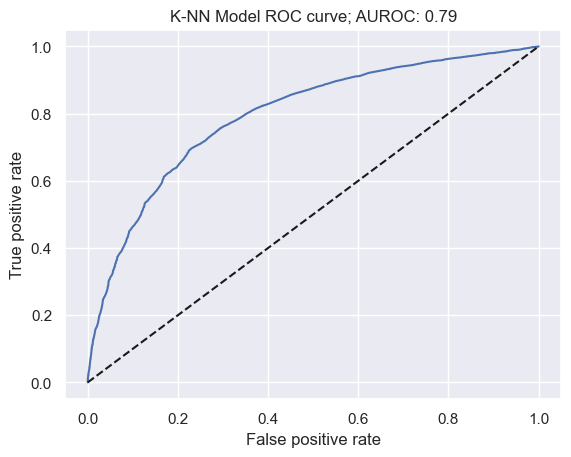

In [151]:
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
y_pred_proba = model.predict_proba(np.array(X_test))[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
sns.set()
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
AUROC = np.round(roc_auc_score(y_test, y_pred_proba), 2)
plt.title(f'K-NN Model ROC curve; AUROC: {AUROC}')
plt.show()